In [1]:
!pip install numpy tensorflow opencv-python matplotlib

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)


tf.random.set_seed(1234)  # for consistent results
np.random.seed(1234)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
def show_random_sample(X, y):
    m, n, n = X.shape  # training examples no, shape of x (28*28)

    fig, axes = plt.subplots(4,4, figsize=(5,5))
    fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

    for i,ax in enumerate(axes.flat):
        random_index = np.random.randint(m)
        ax.imshow(X[random_index], cmap='gray')

        ax.set_axis_off()
    fig.suptitle("Dataset sample", fontsize=14)

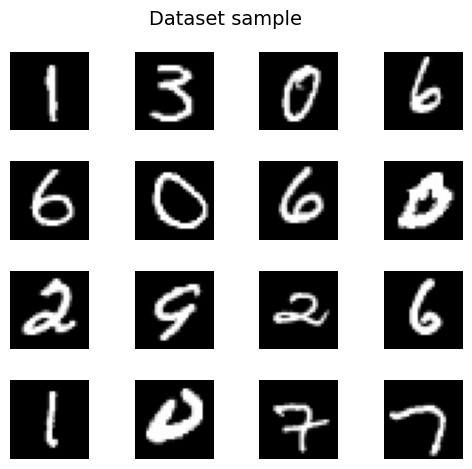

In [6]:
show_random_sample(X_train, y_train)

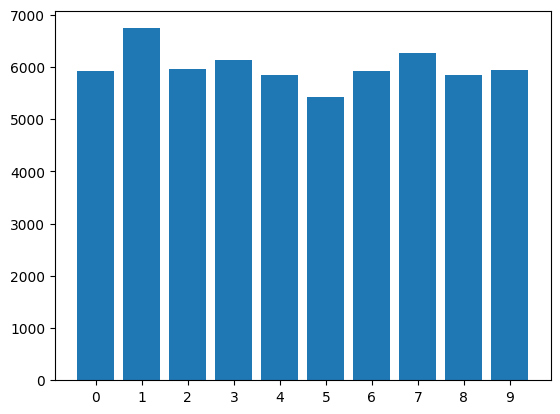

In [7]:
fig, ax = plt.subplots()
y_labels, y_counts = np.unique(y_train, return_counts=True)
ax.bar(y_labels, y_counts)
ax.set_xticks(y_labels)
plt.show()

Since the dataset is balanced, we can use accuracy as a metric for testing ..

In [8]:
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [9]:

# one-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [10]:
print(f"X train shape: {X_train.shape}")

print(f"X test shape: {X_test.shape}")

print(f"y train shape: {y_train.shape}")

print(f"y test shape: {y_test.shape}")


X train shape: (60000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)
y train shape: (60000,)
y test shape: (10000,)


We will try 2 models :
1. nn model
2. cnn model

#Fully connected model Architecture

In [35]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape=X_train.shape[1:]))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(10, activation='softmax'))

model_nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 66970

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_nn.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])


#Fully connected model Training

In [37]:
history_nn = model_nn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),callbacks=[early_stopping], verbose=2)


Epoch 1/10
1875/1875 - 7s - loss: 0.2145 - sparse_categorical_accuracy: 0.9349 - val_loss: 0.1099 - val_sparse_categorical_accuracy: 0.9656 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.1033 - sparse_categorical_accuracy: 0.9683 - val_loss: 0.0923 - val_sparse_categorical_accuracy: 0.9718 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 8s - loss: 0.0795 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0818 - val_sparse_categorical_accuracy: 0.9757 - 8s/epoch - 4ms/step
Epoch 4/10
1875/1875 - 8s - loss: 0.0658 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0752 - val_sparse_categorical_accuracy: 0.9783 - 8s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.0578 - sparse_categorical_accuracy: 0.9817 - val_loss: 0.0809 - val_sparse_categorical_accuracy: 0.9783 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 8s - loss: 0.0517 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0714 - val_sparse_categorical_accuracy: 0.9813 - 8s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 7s - 

#Visualizing the results

In [55]:
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

  _ = ax1.plot(epochs, acc, 'bo', label='Training acc')
  _ = ax1.plot(epochs, val_acc, 'b', label='Validation acc')
  _ = ax1.set_title('Training and validation accuracy')
  _ = ax1.legend()

  _ = ax2.plot(epochs, loss, 'bo', label='Training loss')
  _ = ax2.plot(epochs, val_loss, 'b', label='Validation loss')
  _ = ax2.set_title('Training and validation loss')
  _ = ax2.legend()

# Example usage:
# Assuming 'history' is an instance of keras.callbacks.History
# plot_history(history)


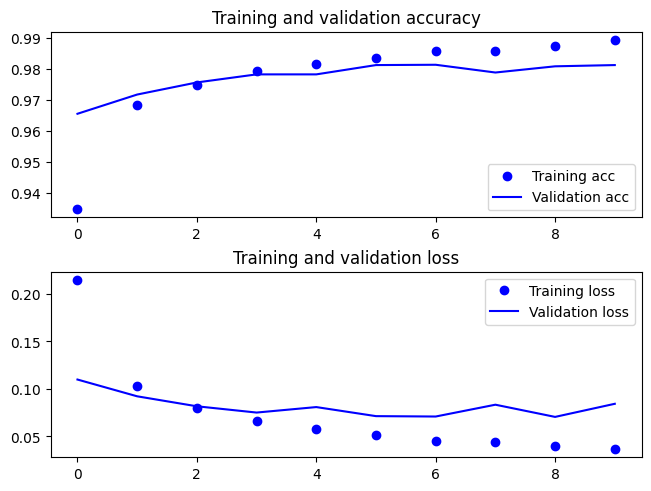

In [57]:
plot_history(history_nn)


#CNN model Architecture

In [58]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu',input_shape=X_train.shape[1:]))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 128)        

In [59]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_cnn.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])


#CNN model training

In [60]:
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),callbacks=[early_stopping], verbose=2)


Epoch 1/10
1875/1875 - 10s - loss: 0.2163 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.0641 - val_sparse_categorical_accuracy: 0.9807 - 10s/epoch - 5ms/step
Epoch 2/10
1875/1875 - 10s - loss: 0.0711 - sparse_categorical_accuracy: 0.9788 - val_loss: 0.0567 - val_sparse_categorical_accuracy: 0.9831 - 10s/epoch - 5ms/step
Epoch 3/10
1875/1875 - 9s - loss: 0.0515 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.0481 - val_sparse_categorical_accuracy: 0.9861 - 9s/epoch - 5ms/step
Epoch 4/10
1875/1875 - 7s - loss: 0.0413 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0460 - val_sparse_categorical_accuracy: 0.9873 - 7s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.0337 - sparse_categorical_accuracy: 0.9896 - val_loss: 0.0507 - val_sparse_categorical_accuracy: 0.9861 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 7s - loss: 0.0284 - sparse_categorical_accuracy: 0.9915 - val_loss: 0.0441 - val_sparse_categorical_accuracy: 0.9876 - 7s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 6

#Visualizing the results

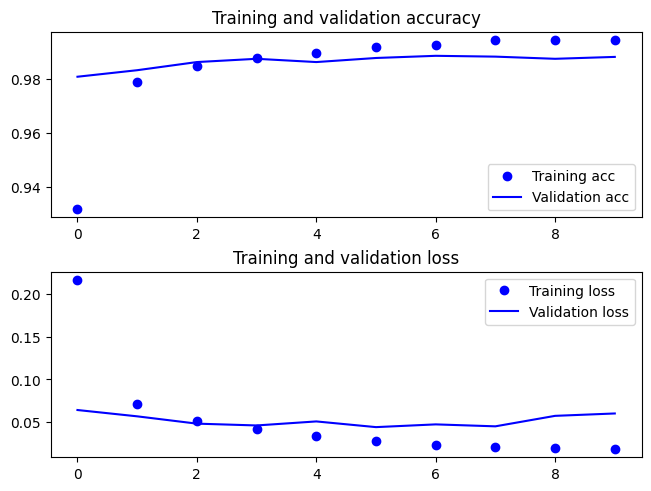

In [61]:
plot_history(history_nn)

In [ ]:
# model_nn.save('handwritten_nn.model')
# model_cnn.save('handwritten_cnn.model')


In [ ]:
# chosen_model = tf.keras.models.load_model('handwritten_cnn.model')

In [64]:
chosen_model = model_cnn

In [66]:
def display_digit(x, y, yhat):
    m, n, n, _ = x.shape

    fig, axis = plt.subplots(1,1,figsize=(3, 3))
    # Display the image
    axis.imshow(x[0], cmap='gray')

    # Display the label above the image
    axis.set_title(f"{y},{yhat}",fontsize=10)

    axis.set_axis_off()
    fig.suptitle("Label, yhat", fontsize=8)
    plt.show()

1/1 [==============================] - 0s 29ms/step
 predicting a zero: 
[[1.00e+00 2.09e-17 9.28e-14 2.99e-18 5.60e-18 1.11e-19 1.18e-16 1.80e-12
  9.57e-17 6.53e-13]]

 Largest prediction index : 0

Total of predictions: 1.000


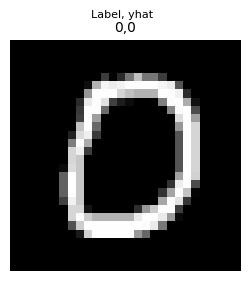

In [67]:
# select random image from test-data
img_of_zero = np.array([X_test[10]])
label_of_zero = y_test[10]

# predict
y_predicted = chosen_model.predict(img_of_zero) # vector
print(f" predicting a zero: \n{y_predicted}\n")

# predicted value - yhat
yhat = np.argmax(y_predicted) # index of the highest probability
print(f" Largest prediction index : {np.argmax(yhat)}\n")

print(f"Total of predictions: {np.sum(y_predicted):0.3f}")

display_digit(img_of_zero, label_of_zero, yhat)


In [74]:
loss, accuracy = chosen_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0.9880


313/313 [==============================] - 1s 3ms/step


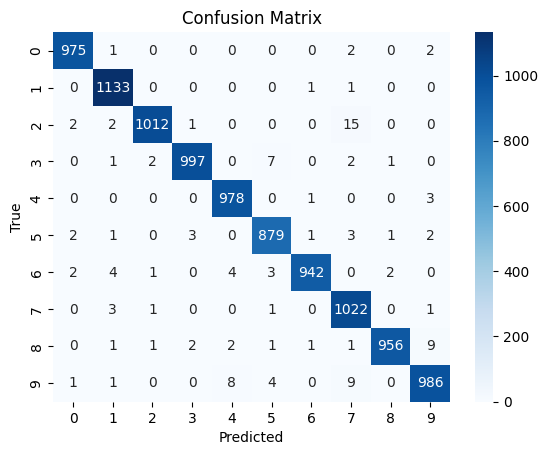

In [77]:
# Predictions on the test data
y_pred = chosen_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels for the test data
y_true = y_test  # Assuming y_test is one-hot encoded

conf_matrix = confusion_matrix(y_true, y_pred_classes)
# Visualize confusion matrix using seaborn heatmap
class_names = [str(i) for i in range(conf_matrix.shape[0])]
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

You can try your test data!

In [71]:
import os
import cv2

img_no = 10
correctly_classified = 0
while os.path.isfile(f"./test-data/{img_no}.png"):
    try:
        # read image
        img = cv2.imread(f"./test-data/{img_no}.png", cv2.IMREAD_GRAYSCALE)

        # preprocessing
        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        img = normalize(img)

        # prediction
        prediction = chosen_model.predict(img)
        print(f"This digit is a {np.argmax(prediction)}.")

        # visualization
        display_digit(img, img_no%10, np.argmax(prediction))

        # increment if it is correctly classified
        correctly_classified += (img_no%10 == np.argmax(prediction))
    except:
        print("Error!")
    finally:
        img_no += 1


In [ ]:
print(f"Percentage of correctly calssified images : {correctly_classified/img_no*100}")
print(f"Number of correctly classified images from {img_no} : {correctly_classified}")